<a href="https://colab.research.google.com/github/kavithabakshi/ADNI/blob/master/ADNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
file = "https://github.com/kavithabakshi/ADNI/blob/master/Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii?raw=true"

In [5]:
pip install dltk

    100% |████████████████████████████████| 296kB 21.9MB/s 
    100% |████████████████████████████████| 42.5MB 852kB/s 
    100% |████████████████████████████████| 337kB 22.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/72/c6/8d739d38edc23d5f5e58aeaeff23df0236bb2449edccf93898
Successfully built dltk
ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.9 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.15
    Uninstalling prompt-toolkit-1.0.15:
      Successfully uninstalled prompt-toolkit-1.0.15


In [0]:
import SimpleITK as sitk
import os
import tensorflow as tf
import pandas as pd
import time

from matplotlib import pyplot as plt
from dltk.io.augmentation import *
from dltk.io.preprocessing import *

In [12]:
#subject_id = meta_data[0]
#data_path = '/content/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
data_path = 'https://github.com/kavithabakshi/ADNI/blob/master/Data/'
t1_fn = os.path.join(data_path, '{}/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii')

        
# Read the .nii image containing a brain volume with SimpleITK and get 
        # the numpy array:
sitk_t1 = sitk.ReadImage(t1_fn)
t1 = sitk.GetArrayFromImage(sitk_t1)

RuntimeError: ignored

TypeError: ignored

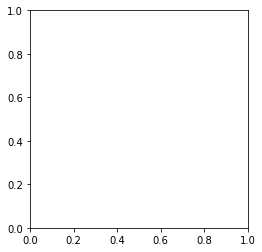

In [8]:
plt.imshow(sitk_t1)